<a href="https://colab.research.google.com/github/vishnurapps/Exploratory-Data-Analysis-on-GOT/blob/master/Exploratory_Data_Analysis_on_GOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np #linear algebra
import matplotlib.pyplot as plt #for viszualizations
import plotly.express as px #for viszualizations
import plotly.graph_objects as go #for viszualizations
import seaborn as sns #for viszualization
from wordcloud import WordCloud, STOPWORDS #for wordcloud and parsing 
import os

In [0]:
##colab
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

In [0]:
!pip install -q kaggle
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d albenft/game-of-thrones-script-all-seasons
!unzip /content/game-of-thrones-script-all-seasons.zip

input_data = "Game_of_Thrones_Script.csv"

In [9]:
!ls

game-of-thrones-script-all-seasons.zip	kaggle.json
Game_of_Thrones_Script.csv		sample_data


In [11]:
df = pd.read_csv(input_data)
df.head()

,Release Date,Season,Episode,Episode Title,Name,Sentence
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.


In [12]:
df.shape

(23911, 6)

In [13]:
df.isnull().sum()

Release Date     0
Season           0
Episode          0
Episode Title    0
Name             3
Sentence         0
dtype: int64

There are 23911 rows and 6 columns
There are 3 missing values in the column Name

## Remove null values

In [0]:
df.dropna(inplace=True) #there are only 3 rows that has missing data. Dropping them

In [15]:
df.head()

,Release Date,Season,Episode,Episode Title,Name,Sentence
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23908 entries, 0 to 23910
Data columns (total 6 columns):
Release Date     23908 non-null object
Season           23908 non-null object
Episode          23908 non-null object
Episode Title    23908 non-null object
Name             23908 non-null object
Sentence         23908 non-null object
dtypes: object(6)
memory usage: 1.3+ MB


Changing the Release Data to data time object as its more easy to handle.

In [0]:
df.loc[:,'Release Date'] = pd.to_datetime(df['Release Date'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23908 entries, 0 to 23910
Data columns (total 6 columns):
Release Date     23908 non-null datetime64[ns]
Season           23908 non-null object
Episode          23908 non-null object
Episode Title    23908 non-null object
Name             23908 non-null object
Sentence         23908 non-null object
dtypes: datetime64[ns](1), object(5)
memory usage: 1.3+ MB


In [0]:
df['Year'] = df['Release Date'].dt.year
df['Month'] = df['Release Date'].dt.month
month_mapper = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
               7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df.loc[:,'Month'] = df['Month'].map(month_mapper)

In [20]:
df.head()

,Release Date,Season,Episode,Episode Title,Name,Sentence,Year,Month
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...,2011,Apr
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...,2011,Apr
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?,2011,Apr
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.,2011,Apr
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.,2011,Apr


In [21]:
temp = df['Season'].value_counts().reset_index()
temp.columns=['Season', 'Counts']
temp.sort_values(by='Season', inplace=True)
px.bar(temp, 'Season', 'Counts', title='Total dialougue counts in season.')

## Most Frequently used words in dialogues .

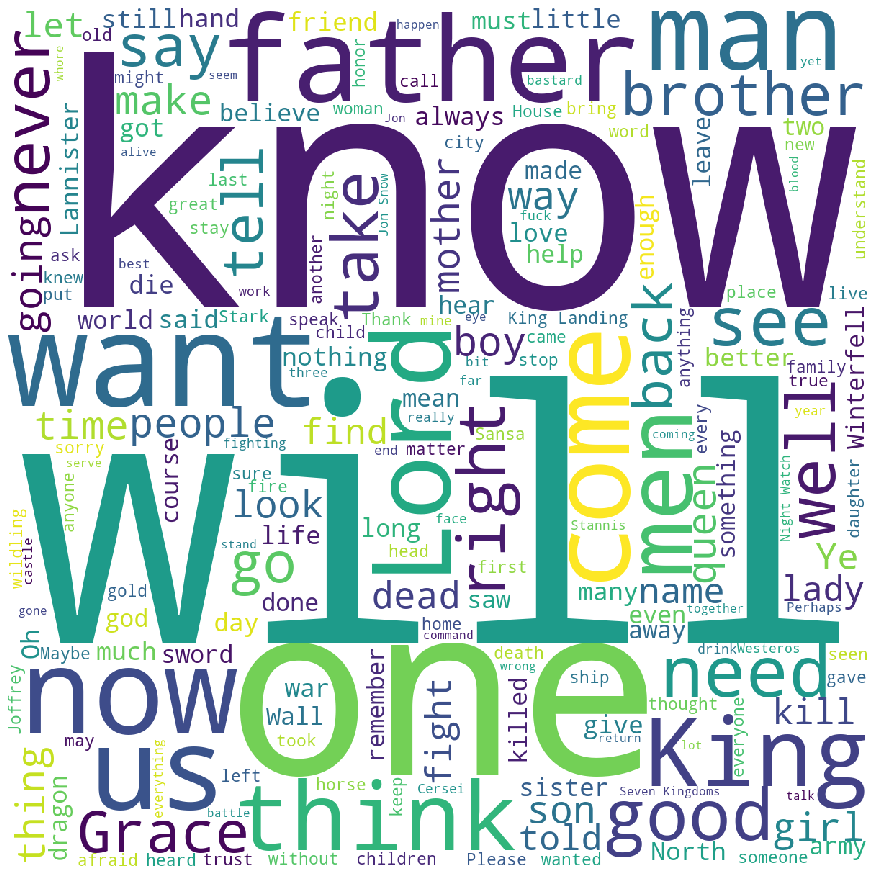

In [24]:
wordcloud = WordCloud(width = 1200, height = 1200,stopwords=STOPWORDS, min_font_size=10, background_color ='white').generate(
    ' '.join(i for i in df['Sentence']))
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

## Common words used by Tyrion Lannister

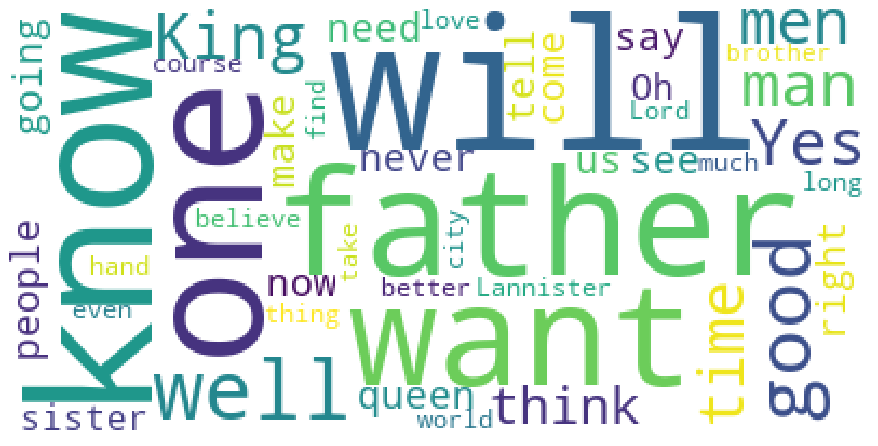

In [31]:
tyrion_lannister = df[df['Name']=='tyrion lannister']
wordcloud = WordCloud(stopwords=STOPWORDS, min_font_size=10, background_color ='white').generate(
    ' '.join(i for i in tyrion_lannister['Sentence']))
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

## Common words used by Arya Stark

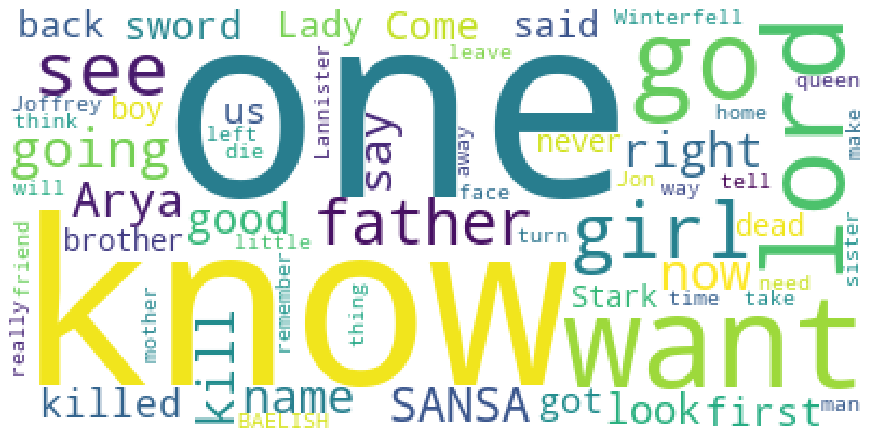

In [30]:
arya_stark = df[df['Name']=='arya stark']
wordcloud = WordCloud(stopwords=STOPWORDS, min_font_size=10, background_color ='white').generate(
    ' '.join(i for i in arya_stark['Sentence']))
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

## Common words used by Cersei Lannister

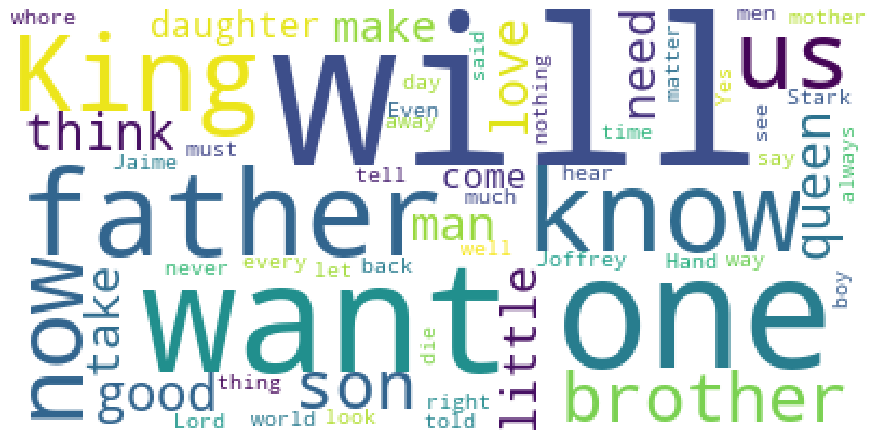

In [28]:
cersei_lannister = df[df['Name']=='cersei lannister']
wordcloud = WordCloud(stopwords=STOPWORDS, min_font_size=10, background_color ='white').generate(
    ' '.join(i for i in cersei_lannister['Sentence']))
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

## Common words used by Khal Drogo

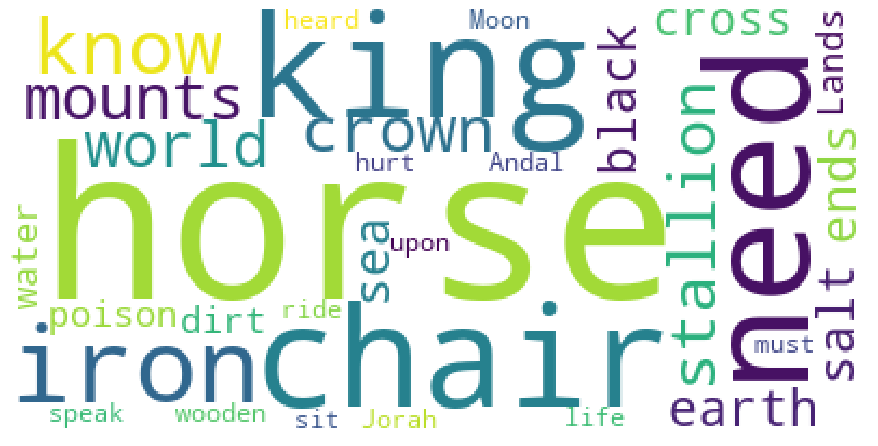

In [29]:
khal_drogo = df[df['Name']=='khal drogo']
wordcloud = WordCloud(stopwords=STOPWORDS, min_font_size=10, background_color ='white').generate(
    ' '.join(i for i in khal_drogo['Sentence']))
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 